## Problem 1

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [6]:
# %qtconsole

In [10]:
def generate_random_rotation_matrix():
    # Generate a random unit-norm vector
    n = np.random.rand(3)
    n /= np.linalg.norm(n)
    
    # Generate a random rotation angle
    theta = np.random.uniform(0, 2 * np.pi)
    
    # Rodrigues formula to convert axis-angle to rotation matrix
    R = np.eye(3) + np.sin(theta) * n + (1 - np.cos(theta)) * np.outer(n, n)
    
    return R

In [1]:
# R

In [14]:
# (a) Generate random 3x3 rotation matrices
random_matrix = generate_random_rotation_matrix()

In [15]:
random_matrix

array([[ 0.98016548, -0.03483093, -0.00476251],
       [ 0.2682898 ,  1.4711373 ,  0.06441966],
       [-0.30941139, -0.54334995,  0.92570654]])

In [23]:
# (b) Generate 9 random rotation matrices and compute the determinant of each one (use np.linalg.det(R))
random_matrices = [generate_random_rotation_matrix() for _ in range(9)]
determinants = [np.linalg.det(R) for R in random_matrices]

In [24]:
random_matrices

[array([[1.14912087, 0.262279  , 0.64755717],
        [0.15740576, 1.27685075, 0.68353428],
        [0.18561395, 0.3264643 , 1.80602832]]),
 array([[1.00124182e+00, 5.93431825e-05, 2.00511273e-03],
        [1.24108638e-03, 1.00005931e+00, 2.00392870e-03],
        [1.24229303e-03, 5.93658025e-05, 1.00200588e+00]]),
 array([[ 1.26441215,  0.12741974,  0.36727546],
        [-0.03537179,  0.9829544 , -0.04913236],
        [ 0.48951053,  0.23589424,  1.67994306]]),
 array([[ 0.81331825, -0.09431395, -0.27345841],
        [-0.19798046,  0.8999778 , -0.29000918],
        [-0.17606697, -0.08895123,  0.74209052]]),
 array([[1.03105853, 0.79611911, 0.64225796],
        [0.05719345, 2.46603206, 1.18270086],
        [0.05193746, 1.33130603, 2.07401252]]),
 array([[1.81735462, 0.53501186, 0.35779673],
        [0.74201952, 1.48570013, 0.32481881],
        [0.69473472, 0.45474914, 1.30411991]]),
 array([[ 0.92502782, -0.07610139, -0.02525906],
        [-0.06615489,  0.93284871, -0.0222884 ],
        

In [25]:
determinants

[2.2319999413159857,
 1.003307004855392,
 1.9273096008963944,
 0.45538656557182466,
 3.571103105884231,
 2.607174656950868,
 0.7018349535850134,
 2.051544782692782,
 0.6691444569034453]

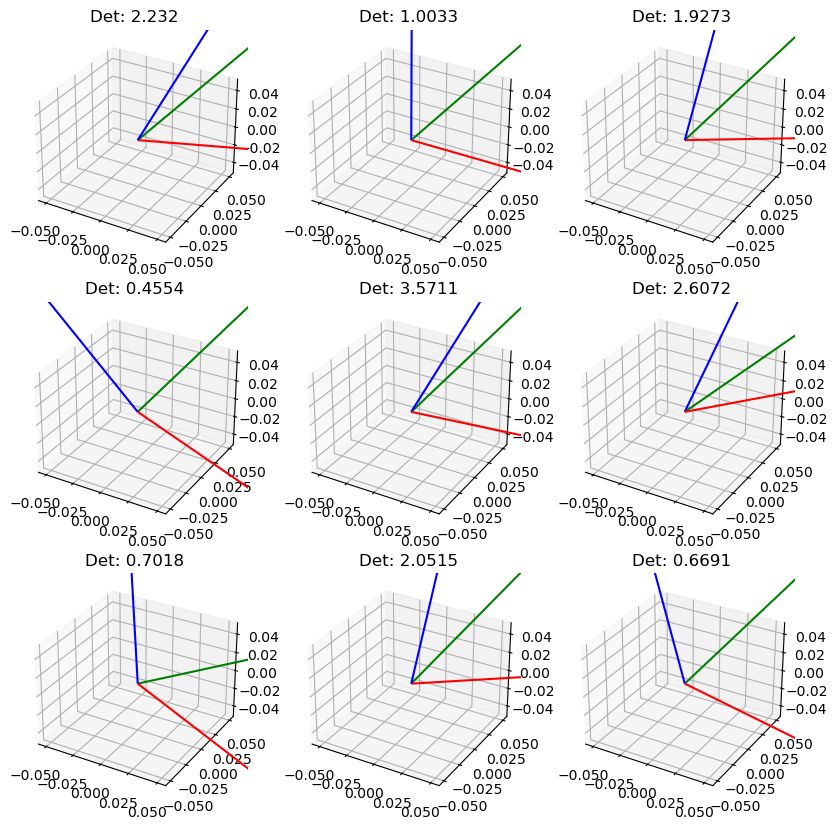

In [26]:
# (c) Generate a figure with 3x3 subplots that each have a random rotation matrix plotted
fig, axs = plt.subplots(3, 3, figsize=(10, 10), subplot_kw={'projection': '3d'})

for i in range(3):
    for j in range(3):
        R = random_matrices[i * 3 + j]
        det_value = round(determinants[i * 3 + j], 4)
        
        # Plot the rotation matrix
        axs[i, j].quiver(0, 0, 0, R[0, 0], R[1, 0], R[2, 0], color='r', label='X-axis')
        axs[i, j].quiver(0, 0, 0, R[0, 1], R[1, 1], R[2, 1], color='g', label='Y-axis')
        axs[i, j].quiver(0, 0, 0, R[0, 2], R[1, 2], R[2, 2], color='b', label='Z-axis')
        
        axs[i, j].set_title(f'Det: {det_value}')

plt.show()

## Problem 2

In [ ]:
# Function to rotate a vector using a rotation matrix
def rotate_vector(rotation_matrix, vector):
    return rotation_matrix @ vector

# Generate a random 3x3 rotation matrix
random_rotation_matrix = generate_random_rotation_matrix()

# Generate a random 3D vector
random_vector = np.random.rand(3)

# Rotate the vector using the rotation matrix
rotated_vector = rotate_vector(random_rotation_matrix, random_vector)

In [ ]:
random_rotation_matrix

array([[1.13862198, 0.06628029, 0.86517554],
       [0.11518701, 1.05507516, 0.71891183],
       [0.37398782, 0.17881739, 3.3341545 ]])

In [ ]:
random_vector

array([0.87977548, 0.31222752, 0.82474801])

In [ ]:
rotated_vector

array([1.73597804, 1.02368331, 3.13469431])

In [ ]:
# Check if the length of the rotated vector is unchanged
original_length = np.linalg.norm(random_vector)
rotated_length = np.linalg.norm(rotated_vector)

print("Original Length:", original_length)
print("Rotated Length:", rotated_length)

# Check if the length is unchanged
if np.isclose(original_length, rotated_length):
    print("Length is unchanged!")
else:
    print("Length is not unchanged!")

Original Length: 1.2456725907650574
Rotated Length: 3.726641339268537
Length is not unchanged!


## Problem 3

In [ ]:
def plot_SE3_transformation(T):
    # Extract translation vector and rotation matrix from the SE(3) transformation matrix
    translation_vector = T[:3, 3]
    rotation_matrix = T[:3, :3]
    
    # Plot line from world origin to the origin of T
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the line in black
    ax.plot([0, translation_vector[0]], [0, translation_vector[1]], [0, translation_vector[2]], color='black')

    # Plot coordinate frame R at the origin of T
    ax.quiver(translation_vector[0], translation_vector[1], translation_vector[2],
              rotation_matrix[0, 0], rotation_matrix[1, 0], rotation_matrix[2, 0], color='r', label='X-axis')
    
    ax.quiver(translation_vector[0], translation_vector[1], translation_vector[2],
              rotation_matrix[0, 1], rotation_matrix[1, 1], rotation_matrix[2, 1], color='g', label='Y-axis')
    
    ax.quiver(translation_vector[0], translation_vector[1], translation_vector[2],
              rotation_matrix[0, 2], rotation_matrix[1, 2], rotation_matrix[2, 2], color='b', label='Z-axis')


    # Set plot labels and title
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.set_title('SE(3) Transformation')
    
    plt.legend()
    plt.show()

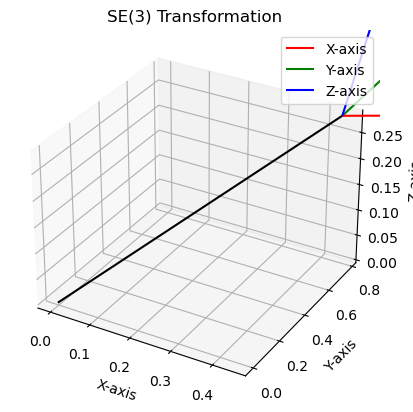

Translation Vector: [0.4453852  0.77542694 0.28640901]
Rotation Matrix:
 [[1.18818819 0.05749443 0.40398219]
 [0.17736249 1.05418701 0.38074274]
 [0.20606296 0.06295545 1.44235382]]


In [ ]:
# (a) Generate a random transformation matrix and plot it
random_translation = np.random.rand(3)
random_rotation = generate_random_rotation_matrix()
random_SE3_matrix = np.eye(4)
random_SE3_matrix[:3, :3] = random_rotation
random_SE3_matrix[:3, 3] = random_translation

plot_SE3_transformation(random_SE3_matrix)

# Print translation vector and rotation matrix
print("Translation Vector:", random_translation)
print("Rotation Matrix:\n", random_rotation)

In [ ]:
# (b) Generate a random xyz homogeneous vector and verify length is unchanged after transformation
random_xyz_vector = np.random.rand(4)
transformed_vector = random_SE3_matrix @ random_xyz_vector

# Check if the length is unchanged
original_length = np.linalg.norm(random_xyz_vector)
transformed_length = np.linalg.norm(transformed_vector[:3])

print("Original XYZ Vector:", random_xyz_vector[:3])
print("Transformed Vector:", transformed_vector[:3])
print("Original Length:", original_length)
print("Transformed Length:", transformed_length)

if np.isclose(original_length, transformed_length):
    print("Length is unchanged!")
else:
    print("Length is not unchanged!")

Original XYZ Vector: [0.4147369  0.56134357 0.79191808]
Transformed Vector: [1.09238049 1.39756674 1.42212049]
Original Length: 1.1928115320226433
Transformed Length: 2.273524708989513
Length is not unchanged!


## Problem 4

In [ ]:
# Define symbols
alpha, beta, gamma, t = sp.symbols('alpha beta gamma t', real=True)
omega_x, omega_y, omega_z = sp.symbols('omega_x omega_y omega_z', real=True)

# Make rotation angles functions of time so we can take derivatives
alpha = sp.Function('alpha', real=True)(t)
beta = sp.Function('beta', real=True)(t)
gamma = sp.Function('gamma', real=True)(t)

In [ ]:
# (a) Define the rotation matrices
Rz_alpha = sp.Matrix([
    [sp.cos(alpha), -sp.sin(alpha), 0],
    [sp.sin(alpha), sp.cos(alpha), 0],
    [0, 0, 1]])

Ry_beta = sp.Matrix([
    [sp.cos(beta), 0, sp.sin(beta)],
    [0, 1, 0],
    [-sp.sin(beta), 0, sp.cos(beta)]])

Rz_gamma = sp.Matrix([
    [sp.cos(gamma), -sp.sin(gamma), 0],
    [sp.sin(gamma), sp.cos(gamma), 0],
    [0, 0, 1]])

# Calculate the overall rotation matrix R
R = sp.simplify(Rz_alpha @ Ry_beta @ Rz_gamma)
R

Matrix([
[-sin(alpha(t))*sin(gamma(t)) + cos(alpha(t))*cos(beta(t))*cos(gamma(t)), -sin(alpha(t))*cos(gamma(t)) - sin(gamma(t))*cos(alpha(t))*cos(beta(t)), sin(beta(t))*cos(alpha(t))],
[ sin(alpha(t))*cos(beta(t))*cos(gamma(t)) + sin(gamma(t))*cos(alpha(t)), -sin(alpha(t))*sin(gamma(t))*cos(beta(t)) + cos(alpha(t))*cos(gamma(t)), sin(alpha(t))*sin(beta(t))],
[                                            -sin(beta(t))*cos(gamma(t)),                                              sin(beta(t))*sin(gamma(t)),               cos(beta(t))]])

In [ ]:
# (b) Compute the derivative of R with respect to time 
R_dot = sp.diff(R,t)
R_dot

Matrix([
[-sin(alpha(t))*cos(beta(t))*cos(gamma(t))*Derivative(alpha(t), t) - sin(alpha(t))*cos(gamma(t))*Derivative(gamma(t), t) - sin(beta(t))*cos(alpha(t))*cos(gamma(t))*Derivative(beta(t), t) - sin(gamma(t))*cos(alpha(t))*cos(beta(t))*Derivative(gamma(t), t) - sin(gamma(t))*cos(alpha(t))*Derivative(alpha(t), t), sin(alpha(t))*sin(gamma(t))*cos(beta(t))*Derivative(alpha(t), t) + sin(alpha(t))*sin(gamma(t))*Derivative(gamma(t), t) + sin(beta(t))*sin(gamma(t))*cos(alpha(t))*Derivative(beta(t), t) - cos(alpha(t))*cos(beta(t))*cos(gamma(t))*Derivative(gamma(t), t) - cos(alpha(t))*cos(gamma(t))*Derivative(alpha(t), t), -sin(alpha(t))*sin(beta(t))*Derivative(alpha(t), t) + cos(alpha(t))*cos(beta(t))*Derivative(beta(t), t)],
[-sin(alpha(t))*sin(beta(t))*cos(gamma(t))*Derivative(beta(t), t) - sin(alpha(t))*sin(gamma(t))*cos(beta(t))*Derivative(gamma(t), t) - sin(alpha(t))*sin(gamma(t))*Derivative(alpha(t), t) + cos(alpha(t))*cos(beta(t))*cos(gamma(t))*Derivative(alpha(t), t) + cos(alpha(t))

In [ ]:
# (c) Derive the relationship between the angular velocity components and the Euler angle rates

# Relationship between angular velocity and the time derivative of R
omega = sp.simplify(R_dot @ R.T)
omega_x = omega[2,1]
omega_y = omega[0,2]
omega_z = -omega[0,1]

omega

In [ ]:
omega_x

-sin(alpha(t))*Derivative(beta(t), t) + sin(beta(t))*cos(alpha(t))*Derivative(gamma(t), t)

In [ ]:
omega_y

sin(alpha(t))*sin(beta(t))*Derivative(gamma(t), t) + cos(alpha(t))*Derivative(beta(t), t)

In [ ]:
omega_z

cos(beta(t))*Derivative(gamma(t), t) + Derivative(alpha(t), t)

## Problem 5